In [128]:
#import libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import random
import numpy as np
import matplotlib.pyplot as plt
import csv

## 1. Creation of a table of destinations and their attractions
The idea here is to create a list of cities and give them a random number of activities from a list of different categories. The distribution of number of activities per city will be lognormal, i. e., few cities will have a very low number and there will be fewer cities as this number increases, while most of them will be around the mode. The activities will be randomly put into one of the categories, with equal probabilities.

### 1.1 Creating the cities
The first idea was to name the cities as 'City_###', but I found a list of fictional locations from games, books, series and movies, so that will be more interesting. I'm using BeautifulSoup to read the website and extract the names of the cities.

In [119]:
#get list of fictional cities from website
url_cities = 'https://list.fandom.com/wiki/List_of_fictional_cities'
html_data=requests.get(url_cities).text
soup = BeautifulSoup(html_data,"html5lib") 

#getting the list from the HTML
list_cities=[]
html_text=soup.findAll('li')[81:-51]
for row in html_text:
    list_cities.append(row.text)

list_cities = [x.split(' - ')[0].split(',')[0].split(';')[0].split('(')[0] for x in list_cities]
#removing empty entries
list_cities = list(filter(None, list_cities))

#editing special cases (typos from the website)
list_special = ['Emmerdale from the British TV series of the same name','Capitol City the capital of the United States of America featured in the game Destroy All Humans! which is based on Washington DC.',
                "Walton's Mountain fictional site in the Blue Ridge Mountains for The Waltons","El-Ysa: village in Klatch in Terry Pratchett's Discworld. The inhabitants were killed when their well was poisoned ",
               "Kamurocho- A fictional city in the Yakuza series", "Everville -town on the West Coast of the USA in Clive Barker's Everville",
               "Earth City in Inverted World by Christopher Priest","Chronopolis by J. G. Ballard", "Villette of Charlotte Brontë", 
               "Ramgarh- Typical village in central India in early 70's. Venue for Bollywood blockbuster Sholay.","Tashbaan capital of the fictional land of Calormen in the Chronicles of Narnia",
               "Empire Bay- Fictional city inspired by New York in Mafia II","Omelas — utopian city from the short story The Ones Who Walk Away From Omelas by Ursula K. Le Guin",
               "St. Erasmus and St. Elmo's- fictional island in the South Caribbean", "The City of Dreadful Night by James Thomson",
               "Isidora from Le città invisibili by Italo Calvino.","PYRUS- capital city of Genovia from the movie the princess diaries",
               "Math a fictional state in an unpublished book 'Math Genius'","DenCity or DenTechCity", "Ephebe -somewhat Grecian city on the Circle Sea in Terry Pratchett's Discworld. Ruled by the "]
list_replace = ['Emmerdale','Capitol City',"Walton's Mountain",'El-Ysa','Kamurocho','Everville','Earth City','Chronopolis', 'Villette','Ramgarh','Tashbaan',"Empire Bay","Omelas",
               "St. Erasmus and St. Elmo's","The City of Dreadful Night","Isidora","Pyrus", "Math",'DenCity','Ephebe']

set1 = set(list_cities)
set2 = set(list_special)
list_cities = list(set1 - set2)
list_cities = list_cities+list_replace


print('Number of cities:',len(list_cities))
list_cities[0:10]


Number of cities: 986


['Quirm',
 'Shelbyville',
 'Bristo Camino',
 'Piltover',
 'Sheltered Shrubs',
 'Robotropolis',
 'Farburg',
 'Rampart Junction',
 'Helldorado',
 'Deer Meadow']

### 1.2 Creating the categories
Looking at websites that sell travel packages, we see lots of categories that are too similar. So here we defined ten different classes that represent most of the options. We are doing this so that each activity is only tagged by one of the categories.

In [120]:
categories = ['Food','Parks','Museums','Hiking','Beach','Romantic','History','Music','Theater','Sports']

### 1.3 Adding the activites to the cities
For each city from our list, we will randomly pick a number of activities, each one assigned to one of the categories above.

In [121]:
cities_activities = []
check_num_act = []
for city in list_cities:
    temp = [city]
    num_act = int(np.ceil(np.random.lognormal(2., 1.)))
    if num_act > 50:
        num_act = 50
    check_num_act.append(num_act)
    for ii in range(num_act):
        temp.append(categories[random.randint(0,9)]) 
    cities_activities.append(temp)
cities_activities[0]

['Quirm', 'Sports', 'Parks', 'Museums', 'Music']

We can check if our distribution meets our expectation by plotting the histogram of the number of cities with a certain number of activities.

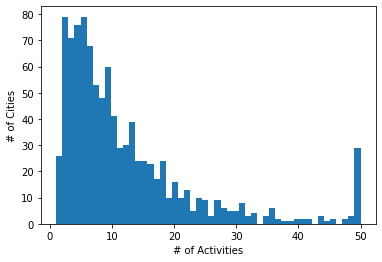

In [122]:
plt.hist(check_num_act,bins=50)
plt.xlabel('# of Activities')
plt.ylabel('# of Cities')
plt.show()

Let's turn this list of cities and activities into a dataframe and then export the file for later use.

In [123]:
columns_df = ['City']
for ii in range(50):
    if len(str(ii+1))<2:
        temp = 'Activity0'+str(ii+1)
    else:
        temp = 'Activity'+str(ii+1)
    columns_df.append(temp)
print(columns_df)

['City', 'Activity01', 'Activity02', 'Activity03', 'Activity04', 'Activity05', 'Activity06', 'Activity07', 'Activity08', 'Activity09', 'Activity10', 'Activity11', 'Activity12', 'Activity13', 'Activity14', 'Activity15', 'Activity16', 'Activity17', 'Activity18', 'Activity19', 'Activity20', 'Activity21', 'Activity22', 'Activity23', 'Activity24', 'Activity25', 'Activity26', 'Activity27', 'Activity28', 'Activity29', 'Activity30', 'Activity31', 'Activity32', 'Activity33', 'Activity34', 'Activity35', 'Activity36', 'Activity37', 'Activity38', 'Activity39', 'Activity40', 'Activity41', 'Activity42', 'Activity43', 'Activity44', 'Activity45', 'Activity46', 'Activity47', 'Activity48', 'Activity49', 'Activity50']


In [124]:
city_table = pd.DataFrame(cities_activities,columns=columns_df)
city_table.head()

,City,Activity01,Activity02,Activity03,Activity04,Activity05,Activity06,Activity07,Activity08,Activity09,...,Activity41,Activity42,Activity43,Activity44,Activity45,Activity46,Activity47,Activity48,Activity49,Activity50
0,Quirm,Sports,Parks,Museums,Music,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Shelbyville,Hiking,History,Romantic,Sports,Music,History,Museums,Food,Theater,...,None,None,None,None,None,None,None,None,None,None
2,Bristo Camino,Parks,Sports,Parks,Food,Beach,Museums,Hiking,Sports,None,...,None,None,None,None,None,None,None,None,None,None
3,Piltover,Hiking,Music,Sports,Romantic,Music,Romantic,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Sheltered Shrubs,Hiking,Museums,Sports,Theater,Hiking,Hiking,Food,Romantic,History,...,None,None,None,None,None,None,None,None,None,None


In [194]:
city_table.tail(10)

,City,Activity01,Activity02,Activity03,Activity04,Activity05,Activity06,Activity07,Activity08,Activity09,...,Activity41,Activity42,Activity43,Activity44,Activity45,Activity46,Activity47,Activity48,Activity49,Activity50
976,Tashbaan,Music,Beach,History,Museums,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
977,Empire Bay,Music,Hiking,Music,Theater,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
978,Omelas,Museums,Romantic,Theater,Hiking,Beach,Romantic,Food,Food,Hiking,...,None,None,None,None,None,None,None,None,None,None
979,St. Erasmus and St. Elmo's,Food,Romantic,Parks,Hiking,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
980,The City of Dreadful Night,Museums,Theater,Food,Museums,Food,Beach,Food,Beach,Food,...,None,None,None,None,None,None,None,None,None,None
981,Isidora,Music,Museums,Museums,Romantic,Sports,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
982,Pyrus,Music,Sports,Hiking,Parks,Museums,Sports,Music,Food,None,...,None,None,None,None,None,None,None,None,None,None
983,Math,Sports,Beach,History,Sports,Parks,Sports,Romantic,History,Hiking,...,None,None,None,None,None,None,None,None,None,None
984,DenCity,History,Food,Sports,Romantic,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
985,Ephebe,Music,Parks,Romantic,History,Romantic,Theater,Theater,Sports,Museums,...,None,None,None,None,None,None,None,None,None,None


In [126]:
city_table.to_csv('city_table.csv',sep=';',index=False)

## 2. Creation of users and their history
The idea here is to create a large number of users by choosing a set of cities and activities they previously visited. For each customer, we will randomly pick a number of cities they already visited and select some of the local available activities.

### 2.1 Creating the users
The first idea was to name the users as 'User_#####', but I found a list with the distribution of given names in Brazil, so that will be more interesting. I'm importing the table and will focus only on the names, not the distribution.

In [132]:
with open('ibgenomes.csv', 'r') as read_obj: # read csv file as a list of lists
  csv_reader = csv.reader(read_obj) # pass the file object to reader() to get the reader object
  list_users_ibge = list(csv_reader) # Pass reader object to list() to get a list of lists

list_users = []
for row in list_users_ibge[1:]:
    list_users = list_users + [row[0]]

list_users[:10]

['MARIA',
 'JOSE',
 'ANA',
 'JOAO',
 'ANTONIO',
 'FRANCISCO',
 'CARLOS',
 'PAULO',
 'PEDRO',
 'LUCAS']

### 2.2 Selecting cities and activities
Now we will create a list with user, city, activity and category. We again use a lognormal distribution to choose the number of cities visited by each user. We randomly select this number of cities. For each city, we count the number of activities available and randomly select how many the user has done, selecting which ones also randomly. 

In [189]:
user_history = []
check_num_cities = []

for name in list_users:
    num_cities = int(np.ceil(np.random.lognormal(.001, 1.)))
    if num_cities>len(city_table):
        num_cities=len(city_table)
    check_num_cities.append([num_cities])
    
    city_picks = random.sample(range(len(city_table)),num_cities)    
    for city in city_picks:
        num_act_city = 50-city_table.iloc[city,1:].isnull().sum()
        num_act = random.randint(1,num_act_city)
        act_picks = random.sample(range(num_act_city),num_act)
        for act in act_picks:
            user_history.append([name,city_table.iloc[city,0],columns_df[act+1],city_table.iloc[city,act+1]])

print(len(user_history))
user_history[100000:200000:500]

906998


[['LUZINALDO', 'San Narciso', 'Activity03', 'History'],
 ['FENANDA', 'Belvedere', 'Activity02', 'Romantic'],
 ['CASSIELE', 'Smallbridge', 'Activity07', 'Music'],
 ['OLIVAN', 'New Quahog', 'Activity20', 'Hiking'],
 ['MILZA', 'Capital City', 'Activity06', 'Museums'],
 ['ALEXANDE', 'Heatherfield', 'Activity01', 'Food'],
 ['AUGUSTINHA', 'Rubacava', 'Activity07', 'History'],
 ['HERIBERTO', 'Gopher Prairie', 'Activity07', 'History'],
 ['JOZELIA', 'Town', 'Activity05', 'Sports'],
 ['RERISON', 'Reefside', 'Activity17', 'Beach'],
 ['EDENISE', 'Manor Park', 'Activity45', 'Romantic'],
 ['LENNON', 'Cyber City', 'Activity08', 'Sports'],
 ['KATARINE', 'Lawson', 'Activity06', 'History'],
 ['GERDA', 'Fourside', 'Activity15', 'Parks'],
 ['FIDELINA', 'Dibley', 'Activity05', 'Parks'],
 ['DEUSAMAR', 'Tomoki City', 'Activity06', 'Museums'],
 ['ETIANE', 'Addley', 'Activity03', 'History'],
 ['ERVERTON', 'Knype', 'Activity39', 'Food'],
 ['PARICIA', 'Westopolis', 'Activity17', 'Theater'],
 ['SEVIRINO', 'Ouigee

Let's turn this list of users and activities into a dataframe and then export the file for later use.


In [190]:
columns_users = ['Name','City','Activity','Category']
user_table = pd.DataFrame(user_history,columns=columns_users)
user_table.head()

,Name,City,Activity,Category
0,MARIA,Middle Park,Activity01,Sports
1,MARIA,Middle Park,Activity02,Parks
2,MARIA,Starvania,Activity08,History
3,MARIA,Starvania,Activity05,Music
4,MARIA,Starvania,Activity07,Sports


In [193]:
user_table.tail(20)

,Name,City,Activity,Category
906978,WERBETY,Toytown,Activity02,Sports
906979,WERBETY,Toytown,Activity13,Romantic
906980,WERBETY,Toytown,Activity09,Theater
906981,WERBETY,Toytown,Activity05,Food
906982,WERBETY,Toytown,Activity07,Theater
906983,WERLIANE,Ariel City,Activity04,Hiking
906984,WERLIANE,Ariel City,Activity01,History
906985,WERLIANE,Ariel City,Activity05,Music
906986,WERLIANE,Ariel City,Activity03,Beach
906987,WERLIANE,Ariel City,Activity02,History


In [192]:
user_table.to_csv('user_table.csv',sep=';',index=False)